# Machine Learning

## Cross Validation

In [23]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor

In [24]:
# Loading the Dataset
df = sns.load_dataset("iris")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [25]:
# Getting Info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
# To check for missing values in our dataset.
print(df.isnull().sum().sort_values(ascending=False))


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [27]:
# Let's Encode the Species Column.
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])


In [35]:
# Create a Model
model = RandomForestRegressor()
# Defining the Features and Target Variable.
X = df.drop("species",axis=1)
y = df["species"]
# Perform k-fold cross-validation with k=5
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the scores for each fold and the mean score
print("Scores for each fold:", [round(score, 4) for score in scores])
print(f"Mean score: {scores.mean():.4f}")
print(f"Standard deviation: {scores.std():.4f}")

Scores for each fold: [np.float64(1.0), np.float64(0.9883), np.float64(0.0), np.float64(0.7978), np.float64(0.0)]
Mean score: 0.5572
Standard deviation: 0.4606


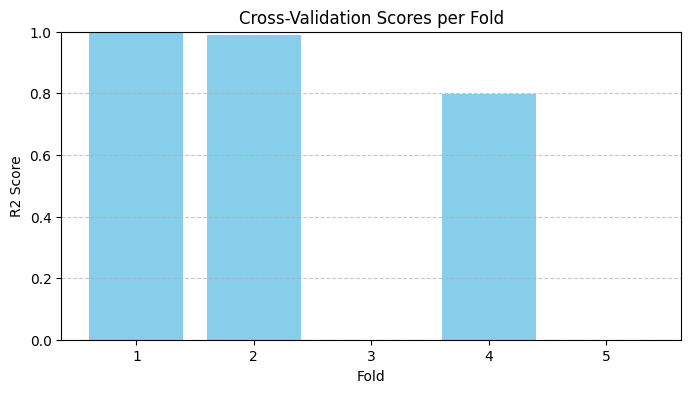

In [36]:
# ...existing code...
import matplotlib.pyplot as plt

# Visualize the cross-validation scores
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(scores) + 1), scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.title('Cross-Validation Scores per Fold')
plt.ylim(0, 1)
plt.xticks(range(1, len(scores) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# ...existing code...

In [39]:
# ...existing code...
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {r2:.4f}")
# ...existing code...

R2 score on test set: 1.0000


In [43]:


# Show some predictions vs actual values (decoded)
print("Actual vs Predicted values (first 10):")
actual_decoded = le.inverse_transform(y_test[:10])
pred_decoded = le.inverse_transform(y_pred[:10])
for actual_num, pred_num, actual_str, pred_str in zip(y_test[:10], y_pred[:10], actual_decoded, pred_decoded):
    print(f"Actual: {actual_num} ({actual_str}), Predicted: {pred_num} ({pred_str})")

Actual vs Predicted values (first 10):
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 0 (setosa), Predicted: 0 (setosa)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 2 (virginica), Predicted: 2 (virginica)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
Actual: 1 (versicolor), Predicted: 1 (versicolor)
